<a href="https://colab.research.google.com/github/alma123456789/tree-regression/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
salaries = df = pd.read_csv('salaries.csv')

In [4]:
print(df.shape)
df.head(10)

(397, 6)


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [5]:
salaries.isnull().sum()

,0
rank,0
discipline,0
yrs.since.phd,0
yrs.service,0
sex,0
salary,0


In [6]:
salaries.describe(include = 'all')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397,397,397.000000,397.000000,397,397.000000
unique,3,2,NaN,NaN,2,NaN
top,Prof,B,NaN,NaN,Male,NaN
freq,266,216,NaN,NaN,358,NaN
mean,NaN,NaN,22.314861,17.614610,NaN,113706.458438
std,NaN,NaN,12.887003,13.006024,NaN,30289.038695
min,NaN,NaN,1.000000,0.000000,NaN,57800.000000
25%,NaN,NaN,12.000000,7.000000,NaN,91000.000000
50%,NaN,NaN,21.000000,16.000000,NaN,107300.000000
75%,NaN,NaN,32.000000,27.000000,NaN,134185.000000


In [7]:
# Convert categorical columns to numerical (0, 1 or 2)
salaries['rank'] = salaries['rank'].astype('category').cat.codes
salaries['discipline'] = salaries['discipline'].astype('category').cat.codes
salaries['sex'] = salaries['sex'].astype('category').cat.codes

In [8]:
salaries.describe(include = 'all')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<Axes: >

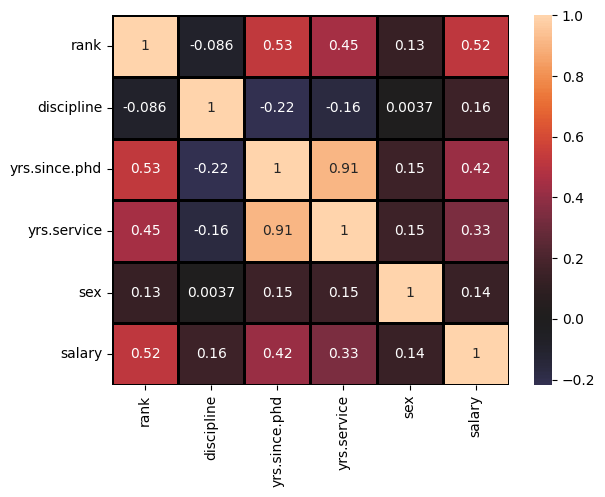

In [9]:
sns.heatmap(df.corr(), annot=True, fmt=".2g", center=0, linewidths=1, linecolor='black')

correlation is relatively high between rank and salary, salary and service, rank and years since phd, years since phd and salary but especcially high between years since phd and years in service. Based on this I will be dropping years of service, since it impacts the salary less than years since phd.

In [10]:
df = df.drop(columns = ["yrs.service"])

<Axes: xlabel='sex', ylabel='salary'>

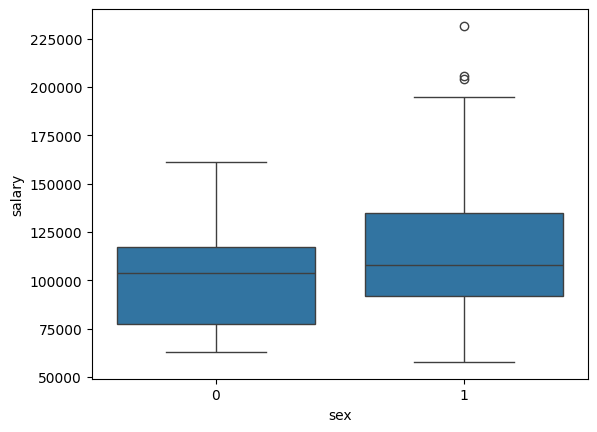

In [11]:
sns.boxplot(data=salaries, x='sex', y='salary')


it appears that males earn less than females in this dataset. The difference is very slight with the means pretty much falling on the same place. The female workers however seem to have more outliers towards both directions of the eraning spectrum, with some earning more than 200000 being even higher than the box plots top limit.

In [12]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['salary'])
scaler = StandardScaler()
X_standarized = scaler.fit_transform(X)

In [13]:
X_standarized

array([[ 0.64925739,  0.91540317, -0.25754973,  0.3300584 ],
       [ 0.64925739,  0.91540317, -0.17985426,  0.3300584 ],
       [-0.67256406,  0.91540317, -1.42298184,  0.3300584 ],
       ...,
       [ 0.64925739, -1.09241483,  1.52944617,  0.3300584 ],
       [ 0.64925739, -1.09241483,  0.20862311,  0.3300584 ],
       [-0.67256406, -1.09241483, -1.11219995,  0.3300584 ]])

In [14]:
X_standarized = pd.DataFrame(X_standarized, columns=X.columns)
X_standarized.head()

,rank,discipline,yrs.since.phd,sex
0,0.649257,0.915403,-0.257550,0.330058
1,0.649257,0.915403,-0.179854,0.330058
2,-0.672564,0.915403,-1.422982,0.330058
3,0.649257,0.915403,1.762533,0.330058
4,0.649257,0.915403,1.374055,0.330058


In [15]:
y = df['salary']
X_standarized = sm.add_constant(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_standarized, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [17]:
model = sm.OLS(y_train1, X_train1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     48.21
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.52e-31
Time:                        22:09:13   Log-Likelihood:                -3639.7
No. Observations:                 317   AIC:                             7289.
Df Residuals:                     312   BIC:                             7308.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.095e+04   5176.287     11.775

In [18]:
predictions_multilinear = model.predict(X_test1)

In [19]:
results_multilinear = pd.DataFrame({
    'Actual': y_test1.values.astype(int),
    'Predicted': predictions_multilinear.astype(int)
})

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print("MAE:", round(mean_absolute_error(y_test1, predictions_multilinear), 0))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test1, predictions_multilinear)), 0))

MAE: 21054.0
RMSE: 27059.0


In [21]:
df1 = df.drop(columns=['sex'])

In [22]:
# Exclude the target variable ('tsales') if you're not standardizing it
X1 = df1.drop(columns=['salary'])  # Exclude target variable

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_standarized = scaler.fit_transform(X1)

# Convert to a dataframe
X_standarized = pd.DataFrame(X_standarized, columns=X1.columns)

#Prepare X and Y
y = df1['salary']
X_standarized = sm.add_constant(X1)

#Training and Test Set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_standarized, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
#Regression model
model = sm.OLS(y_train1, X_train1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     63.75
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           3.39e-32
Time:                        22:09:13   Log-Likelihood:                -3640.4
No. Observations:                 317   AIC:                             7289.
Df Residuals:                     313   BIC:                             7304.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.502e+04   3820.221     17.020

In [23]:
predictions_multilinear = model.predict(X_test1)

In [24]:
results_multilinear = pd.DataFrame({
    'Actual': y_test1.values.astype(int),
    'Predicted': predictions_multilinear.astype(int)
})

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print("MAE:", round(mean_absolute_error(y_test1, predictions_multilinear), 0))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test1, predictions_multilinear)), 0))

MAE: 21003.0
RMSE: 27065.0


tree diagram code

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [28]:
#model training
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

In [29]:
feature_importances = tree_model.feature_importances_

In [30]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

         Feature  Importance
0           rank    0.590809
2  yrs.since.phd    0.287520
1     discipline    0.100475
3            sex    0.021196


In [31]:
df2 = df.drop(columns=['sex'])

In [32]:
X2 = df2.drop(columns=['salary'])

In [33]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

In [34]:
# Make predictions on the test set for tree regression model
predictions_tree = tree_model.predict(X_test2)

In [35]:
#Result for tree regression
results_multilinear = pd.DataFrame({
    'Actual': y_test2.values.astype(int),
    'Predicted': predictions_tree.astype(int)
})
results_multilinear

,Actual,Predicted
0,205500,122488
1,132261,142923
2,150680,112410
3,106300,105350
4,118971,120570
...,...,...
75,162150,168610
76,115435,114330
77,84240,86770
78,136000,108959


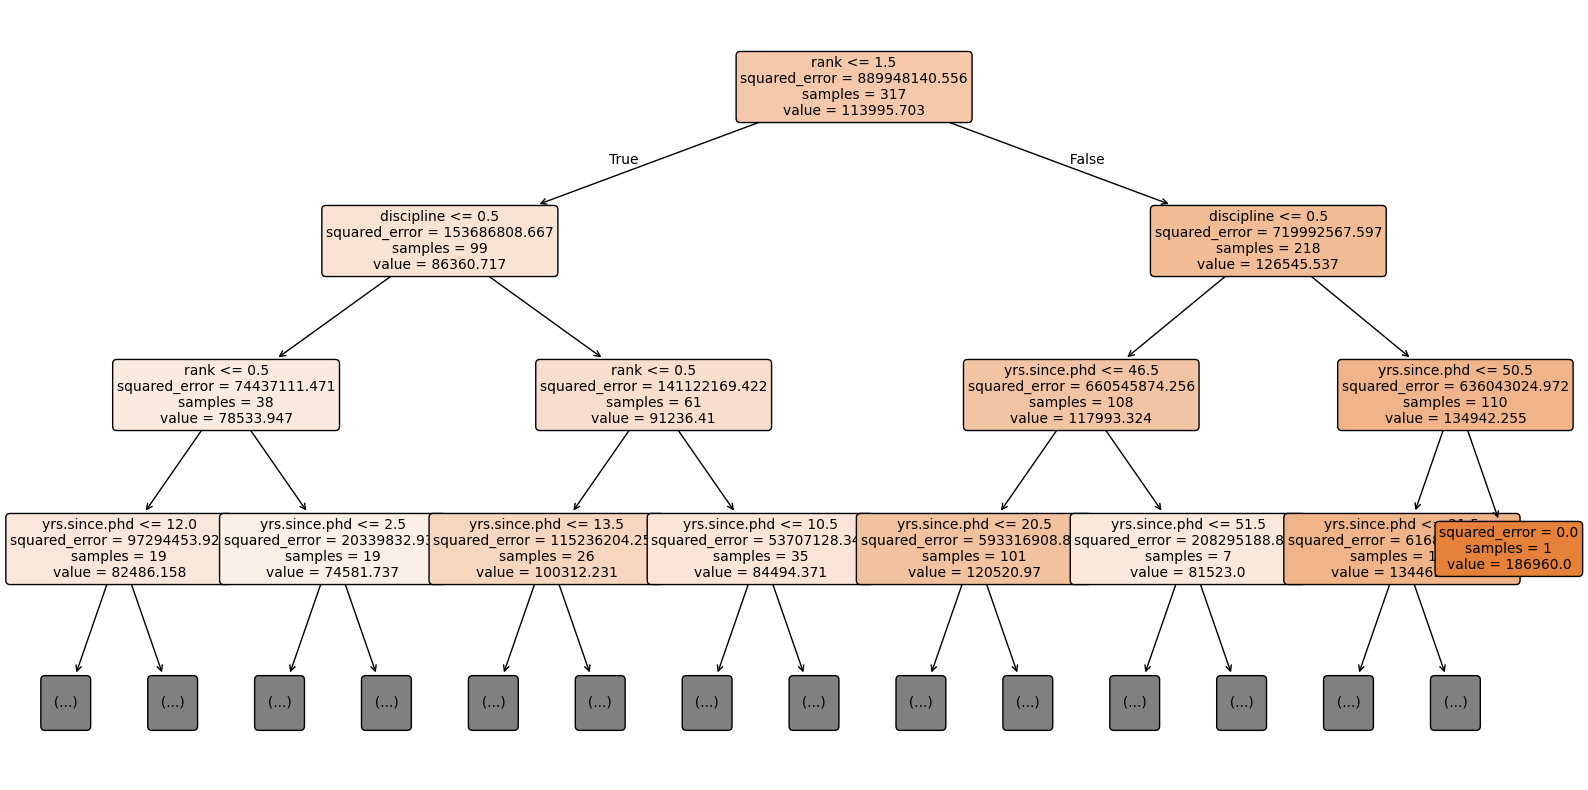

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X2.columns, max_depth=3, filled=True, rounded=True,fontsize=10)
plt.show()

In [39]:
# Calculate performance metrics for tree regression
print("MAE:", round(mean_absolute_error(y_test2, predictions_tree), 0))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test2, predictions_tree)), 0))

MAE: 19341.0
RMSE: 27928.0
